# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [126]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA

from loguru import logger

In [127]:
# # Algumas configurações para o matplotlib.
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

fifa = pd.read_csv("fifa.csv")

In [128]:
fifa = pd.read_csv("fifa.csv")

In [129]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [130]:
fifa.describe()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [131]:
fifa.dtypes

Age                  int64
Overall              int64
Potential            int64
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
GKDiving           float64
GKHandling         float64
GKKicking          float64
GKPositioning      float64
GKReflexes         float64
d

In [132]:
cons = pd.DataFrame({'colunas':fifa.columns,
                'tipo': fifa.dtypes,
                'missing':fifa.isna().sum(),
                'size':fifa.shape[0],
                'unicos':fifa.nunique()})
cons['percentual'] = round(cons['missing']/cons['size'],5)
cons

,colunas,tipo,missing,size,unicos,percentual
Age,Age,int64,0,18207,29,0.00000
Overall,Overall,int64,0,18207,48,0.00000
Potential,Potential,int64,0,18207,47,0.00000
Crossing,Crossing,float64,48,18207,89,0.00264
Finishing,Finishing,float64,48,18207,93,0.00264
HeadingAccuracy,HeadingAccuracy,float64,48,18207,91,0.00264
ShortPassing,ShortPassing,float64,48,18207,85,0.00264
Volleys,Volleys,float64,48,18207,87,0.00264
Dribbling,Dribbling,float64,48,18207,94,0.00264
Curve,Curve,float64,48,18207,89,0.00264


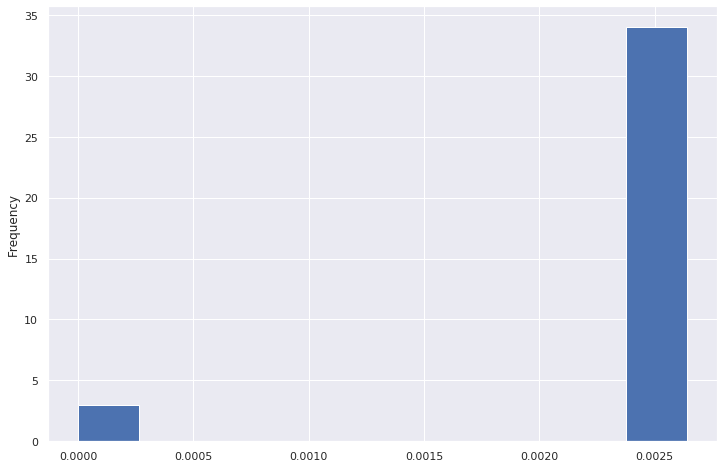

In [133]:
cons.percentual.plot.hist()

In [134]:
print('numero de colunas sem dados faltante',cons[cons.percentual==0].shape[0])
print('numero de colunas com dados faltante',cons[cons.percentual>0].shape[0])

numero de colunas sem dados faltante 3
numero de colunas com dados faltante 34


In [135]:
cons[cons.percentual==0]['tipo'].value_counts()

int64    3
Name: tipo, dtype: int64

In [180]:
fifa=fifa.dropna()

In [185]:
pca = PCA().fit(fifa)

evr = pca.explained_variance_ratio_
evr[0].round(3)

0.565

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [186]:
def q1():
    pca = PCA().fit(fifa)

    evr = pca.explained_variance_ratio_
    return float(round(evr[0],3))

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [143]:
def q2():
    pca_095 = PCA(n_components=0.95)
    X_reduced = pca_095.fit_transform(fifa)

    return X_reduced.shape[1] # Segundo elemento da tupla é o número de componentes encontrados.
    

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [190]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]
myPCA = PCA(n_components=2).fit(fifa)
com = myPCA.components_.dot(x)
tuple(com.round(3))

(186.556, -6.592)

In [145]:
def q3():
    myPCA = PCA(n_components=2).fit(fifa)
    com = myPCA.components_.dot(x)
    return tuple(com.round(3))

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [195]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()

Y_train = fifa['Overall']
X_train = fifa.drop(['Overall'], axis=1)
reg.fit(X_train, Y_train)

colunas_treinamento = X_train.columns

from sklearn.feature_selection import RFE

rfe = RFE(reg, n_features_to_select=5)
rfe.fit(X_train, Y_train)

fifa_selected = pd.DataFrame({'coluna':X_train.columns,
            'escolheu_a_feature': rfe.get_support(),
            'coeficientes': pd.Series(reg.coef_)})

fifa_selected = fifa_selected[fifa_selected['escolheu_a_feature']==True]
list([fifa_selected['coluna']])

[0             Age
 1       Potential
 11    BallControl
 15      Reactions
 35     GKReflexes
 Name: coluna, dtype: object]

In [124]:
def q4():
    from sklearn.linear_model import LinearRegression

    reg= LinearRegression()

    Y_train = fifa['Overall']
    X_train = fifa.drop(['Overall'], axis=1)
    reg.fit(X_train, Y_train)

    colunas_treinamento = X_train.columns

    from sklearn.feature_selection import RFE

    rfe = RFE(reg, n_features_to_select=5)
    rfe.fit(X_train, Y_train)

    fifa_selected = pd.DataFrame({'coluna':X_train.columns,
                'escolheu a feature': rfe.get_support(),
                'coeficientes': pd.Series(reg.coef_)})

    fifa_selected = fifa_selected[fifa_selected['escolheu a feature']==True]
    return list(fifa_selected['coluna'])